**Scaling Up: Multi-class Classification 🚀**

We've frequently referenced the TinyVGG architecture from the CNN Explainer website, but there's a key difference: their model handles 10 distinct image classes, whereas ours currently only distinguishes between two classes (pizza and steak) 🍕🥩.

**Your Turn 🛠️**

Before proceeding, take a moment to think about how you would modify our existing model to accommodate 10 classes of similar images. Assume the data is structured similarly to our two-class problem. Can you rise to the challenge? 💡

Recall the steps we took to build our pizza vs. steak classifier? Let's revisit those steps, this time working with 10 different types of food 🍴.

**The Workflow 🔄**

1. **Data Exploration**: Immerse yourself in the data (visualize, visualize, visualize...) 🔍
2. **Data Preprocessing**: Prepare the data for modeling 📈
3. **Model Creation**: Establish a baseline model 📊
4. **Model Fitting**: Train the model 🚂
5. **Model Evaluation**: Assess the model's performance 📊
6. **Model Refining**: Adjust parameters to improve the model (aim to beat your baseline) 💪
7. **Iteration**: Repeat the process until satisfied 🔁

### 1. Import and become one with the data

Again, we've got a subset of the [Food101 dataset](https://www.kaggle.com/dansbecker/food-101). In addition to the pizza and steak images, we've pulled out another eight classes.


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
"/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data"

'/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data'

In [3]:
# import zipfile

# # Download zip file of 10_food_classes images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
# zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/')
# zip_ref.close()

In [4]:
import os

# walking through the 10 classes of food image data.
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/'.
There are 10 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes

In [5]:
import os

# walking through the 10 classes of food image data.
for path, foldername, filenames in os.walk("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/"):
  print(f"In '{path}' there are {len(foldername)} directories and {len(filenames)} images .")

In '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/' there are 2 directories and 0 images .
In '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/test' there are 10 directories and 0 images .
In '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/test/ice_cream' there are 0 directories and 250 images .
In '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/test/chicken_curry' there are 0 directories and 250 images .
In '/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/test/steak' there are 0 d

In [6]:
# Train and test directory
train_dir = "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/train/"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/data/10_food_classes_all_data/test/"

In [7]:
# Visualizing our data
import pathlib
import numpy as np
data_folder = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_folder.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


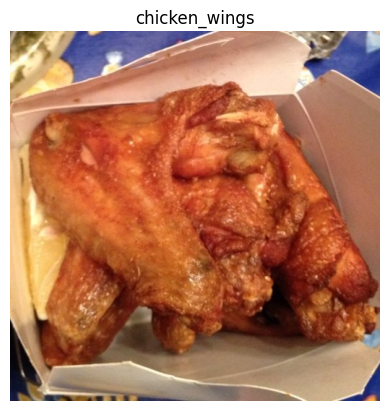

In [9]:
# Visualize, visualize, visualize
import random
img = view_random_image(train_dir,
                         target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

After going through a handful of images (it's good to visualize at least 10-100 different examples), it looks like our data directories are setup correctly.

Time to preprocess the data.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
## generated trained data = train_datagen
gtrd = ImageDataGenerator(rescale=1/255.)
gted =  ImageDataGenerator(rescale=1/255.)

# load data from folders and turn them into batches
## train data= train_data
trd = gtrd.flow_from_directory(train_dir,
                               target_size=(224,224),
                               batch_size=32,
                               class_mode="categorical")

ted = gted.flow_from_directory(test_dir,
                                     target_size=(224,224),
                                     batch_size=32,
                                     class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [11]:
# # Building a CNN model
import tf_keras as keras
from tf_keras.optimizers import Adam
from tf_keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tf_keras import Sequential

# tensorflow.keras.set_seed(42)

# model1 = keras.Sequential([
#     keras.layers.Input(shape=(224,224,3)),
#     keras.layers.Conv2D(filters=10,
#                         kernel_size=3,
#                         activation="relu"),
#     keras.layers.Conv2D(1,3,activation="relu"),
#     keras.layers.MaxPool2D,
#     keras.layers.Conv2D(1,3,activation="relu"),
#     keras.layers.Conv2D(1,3,activation="relu"),
#     keras.layers.MaxPool2D,
#     keras.layers.Flatten(),
#     keras.layers.Dense(10, activation="softmax")
# ])

# model1.compile(loss="categorical_crossentropy",
#                optimizers=Adam(),
#                metrics= ["accuracy"])

    OR

In [12]:
# Create our model (a clone of model_8, except to be multi-class)
model1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model1.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=Adam(),
                metrics=["accuracy"])

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [14]:
# Fit the model
mod_1 = model1.fit(trd, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(trd),
                        validation_data=ted,
                        validation_steps=len(ted))

Epoch 1/5
235/235 [==============================] - 3945s 17s/step - loss: 2.1970 - accuracy: 0.1781 - val_loss: 2.0256 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 59s 252ms/step - loss: 1.9322 - accuracy: 0.3224 - val_loss: 1.9262 - val_accuracy: 0.3152
Epoch 3/5
235/235 [==============================] - 58s 249ms/step - loss: 1.7128 - accuracy: 0.4136 - val_loss: 1.9222 - val_accuracy: 0.3180
Epoch 4/5
235/235 [==============================] - 64s 275ms/step - loss: 1.1636 - accuracy: 0.6116 - val_loss: 2.1340 - val_accuracy: 0.3204
Epoch 5/5
235/235 [==============================] - 62s 263ms/step - loss: 0.4644 - accuracy: 0.8511 - val_loss: 3.3264 - val_accuracy: 0.3000


### 5. Evaluate the model

LesGoo! We've just trained a model on 10 different classes of food images, let's see how it went.

In [18]:
# Plot the validation and training curves separately
# where mod is the history [history = mod]
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

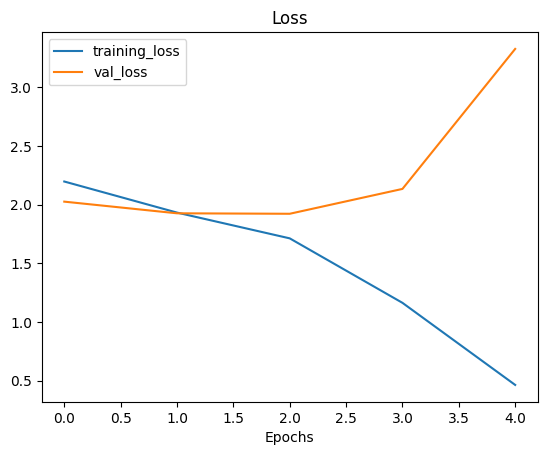

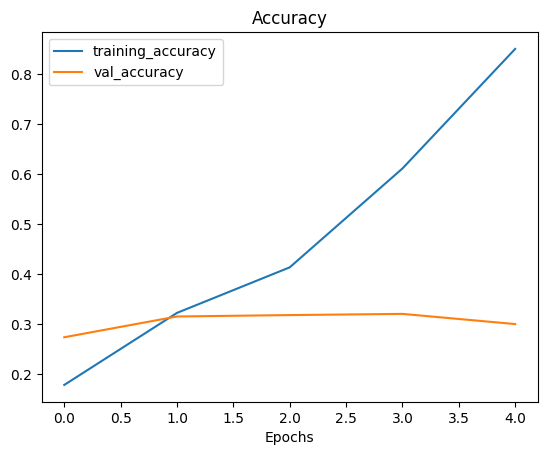

In [19]:
plot_loss_curves(mod_1)

### 6. Refine the Model Parameters

Our model has demonstrated promising performance on the training data, but we need to ensure it can generalize well to new, unseen data. Performing well on the training data is just the first step; the real test is how it fares on the test data.

To bridge this gap, we'll focus on preventing overfitting, a common issue where the model becomes too specialized to the training data and fails to recognize patterns in new data. There are several strategies to mitigate overfitting:

* **Collect more data**: Increasing the dataset size provides the model with more opportunities to learn generalizable patterns.
* **Simplify the model**: If the current model is overfitting, it may be too complex. Reducing the number of layers or hidden units can help.
* **Use data augmentation**: Artificially increasing the diversity of the training data can help the model learn more robust patterns.
* **Leverage transfer learning**: Utilizing pre-trained models as a foundation for our task can help the model generalize better.

> 🔑 **Note:** Preventing overfitting is also known as **regularization**.

Given that collecting more data is a time-consuming process, we'll explore the other options first. Let's start by simplifying our model.

To do this, we'll remove two convolutional layers, reducing the total number of convolutional layers from four to two. This will help us determine if a less complex model can still capture the essential patterns in the data.

By refining our model parameters, we aim to improve its ability to generalize to new data and ultimately achieve better performance on the test data.

In [20]:
# Create our model (a clone of model_8, except to be multi-class)
model2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model2.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=Adam(),
                metrics=["accuracy"])

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [22]:
# Fit the model
mod_2 = model2.fit(trd, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(trd),
                        validation_data=ted,
                        validation_steps=len(ted))

Epoch 1/5
235/235 [==============================] - 64s 269ms/step - loss: 2.2666 - accuracy: 0.2295 - val_loss: 1.9707 - val_accuracy: 0.3120
Epoch 2/5
235/235 [==============================] - 60s 257ms/step - loss: 1.8214 - accuracy: 0.3768 - val_loss: 1.9223 - val_accuracy: 0.3364
Epoch 3/5
235/235 [==============================] - 63s 268ms/step - loss: 1.4615 - accuracy: 0.5172 - val_loss: 2.1392 - val_accuracy: 0.3036
Epoch 4/5
235/235 [==============================] - 57s 244ms/step - loss: 1.0104 - accuracy: 0.6783 - val_loss: 2.2708 - val_accuracy: 0.3144
Epoch 5/5
235/235 [==============================] - 62s 265ms/step - loss: 0.5857 - accuracy: 0.8232 - val_loss: 2.8322 - val_accuracy: 0.3164


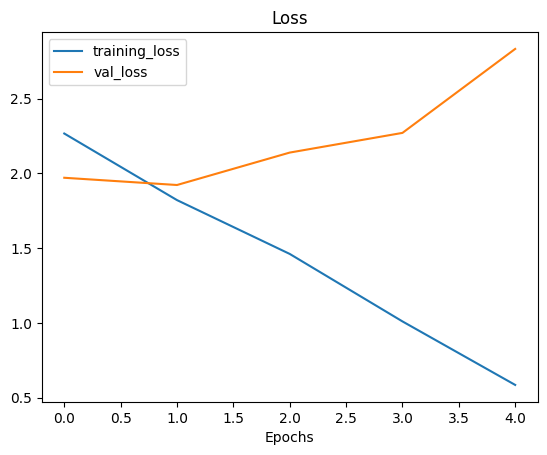

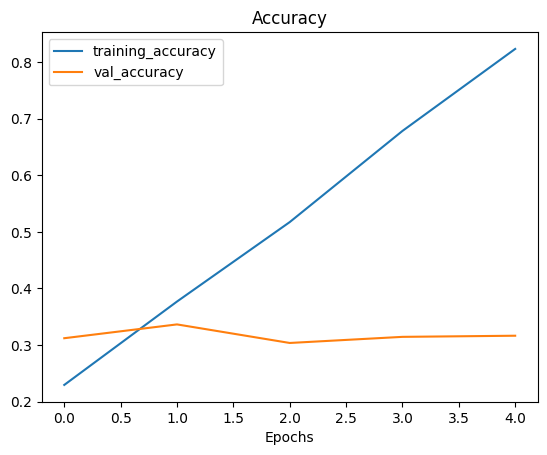

In [23]:
plot_loss_curves(mod_2)

### Reducing Overfitting with Data Augmentation

To improve our model's performance, we can use a technique called data augmentation. Here's what we aim to achieve:

* **Reduce Overfitting**: We want the model to perform similarly well on both the training and validation data sets. This means we need to make the training and validation loss curves closer to each other.
* **Improve Validation Accuracy**: By making the model generalize better, we hope to increase the accuracy when it is tested on new, unseen data.

### How Data Augmentation Helps

Data augmentation involves creating more training data by applying various transformations to the existing images, such as:
- **Flipping**: Mirroring the image horizontally or vertically.
- **Rotation**: Rotating the image by different angles.
- **Scaling**: Changing the size of the image.
- **Translation**: Moving the image slightly.
- **Brightness Adjustment**: Changing the brightness of the image.
- **Adding Noise**: Introducing random noise to the image.

By doing this, we make the model see more diverse versions of the same images, which helps it learn more general features rather than memorizing specific details of the training data. This approach can prevent the model from overfitting and improve its ability to generalize to new data.

In [24]:
# Augmumented training data Generator
atrdg = ImageDataGenerator(rescale=1/255.,
                          rotation_range=0.2,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True)

# Augmumented training data
atrd = atrdg.flow_from_directory(train_dir,
             target_size=(224,224),
             batch_size=32,
             class_mode="categorical"
             )


Found 7500 images belonging to 10 classes.


In [25]:
# Creating model to fit on the augumented data
model3= keras.models.clone_model(model1)

# Compile the model
model3.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=Adam(),
                metrics=["accuracy"])

In [26]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [28]:
mod_3 = model3.fit(atrd,
                   epochs=5,
                   steps_per_epoch=len(atrd),
                   validation_data=ted,
                   validation_steps=len(ted))

Epoch 1/5
235/235 [==============================] - 150s 626ms/step - loss: 2.2358 - accuracy: 0.1603 - val_loss: 2.0730 - val_accuracy: 0.2408
Epoch 2/5
235/235 [==============================] - 145s 618ms/step - loss: 2.1233 - accuracy: 0.2291 - val_loss: 1.9725 - val_accuracy: 0.3028
Epoch 3/5
235/235 [==============================] - 145s 617ms/step - loss: 2.0904 - accuracy: 0.2484 - val_loss: 1.9893 - val_accuracy: 0.3004
Epoch 4/5
235/235 [==============================] - 141s 602ms/step - loss: 2.0305 - accuracy: 0.2805 - val_loss: 1.8830 - val_accuracy: 0.3464
Epoch 5/5
235/235 [==============================] - 135s 576ms/step - loss: 1.9958 - accuracy: 0.3000 - val_loss: 1.8538 - val_accuracy: 0.3536


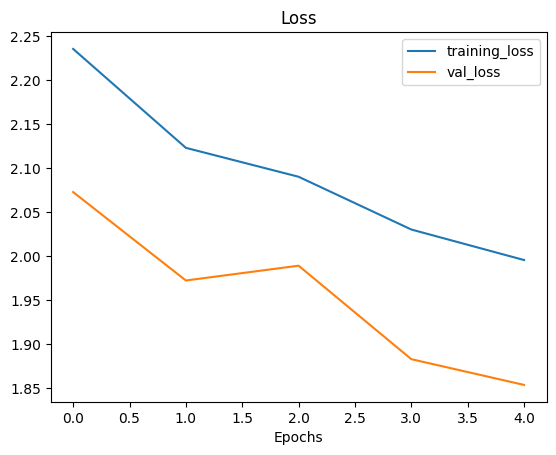

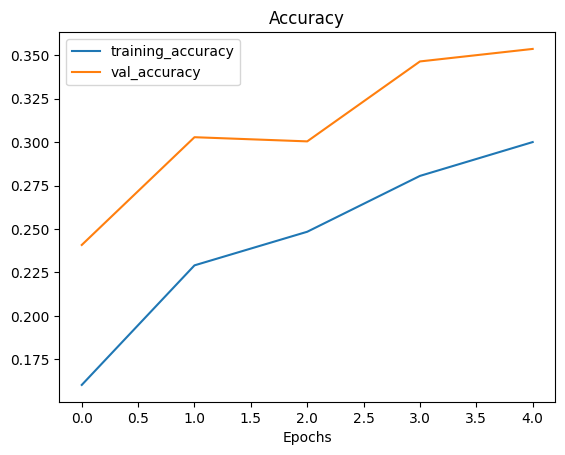

In [32]:
plot_loss_curves(mod_3)

In [33]:
# Create a function to import an image and resize it to be able to be used with our model
import tensorflow as tf
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [37]:
IG = tf.io.read_file("1_pizza.jpg")
IG= tf.image.decode_image(IG,channels=3)
IG=tf.image.resize(IG, (224,224))
IG/255.

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.26388162, 0.1635154 , 0.1481691 ],
        [0.33304223, 0.21480542, 0.18711162],
        [0.23517115, 0.15997855, 0.15545301],
        ...,
        [0.3584827 , 0.27612975, 0.20946307],
        [0.32439262, 0.25772595, 0.19498084],
        [0.40420443, 0.2979975 , 0.21536201]],

       [[0.23147435, 0.14949878, 0.1152781 ],
        [0.26382953, 0.16640308, 0.13055749],
        [0.27524015, 0.17950314, 0.16381687],
        ...,
        [0.32950857, 0.25589272, 0.19937083],
        [0.29592177, 0.23317666, 0.17435314],
        [0.35222095, 0.27331123, 0.2066446 ]],

       [[0.29508927, 0.18136379, 0.14999124],
        [0.24006219, 0.17022805, 0.14913468],
        [0.3525384 , 0.23548016, 0.20143995],
        ...,
        [0.28018138, 0.22689936, 0.17105913],
        [0.27067873, 0.21474859, 0.17195407],
        [0.35978097, 0.25552145, 0.1803625 ]],

       ...,

       [[0.32337055, 0.21748817, 0.14233062],
        [0.54

In [38]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

--2024-08-31 08:50:32--  https://raw.githubusercontent.com/siddhant-rajhans/TensorFlow/main/Basics/assets/images/1_pizza.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3243616 (3.1M) [image/jpeg]
Saving to: ‘1_pizza.jpg.3’

1_pizza.jpg.3       100%[===================>]   3.09M  --.-KB/s    in 0.05s   

2024-08-31 08:50:32 (62.3 MB/s) - ‘1_pizza.jpg.3’ saved [3243616/3243616]



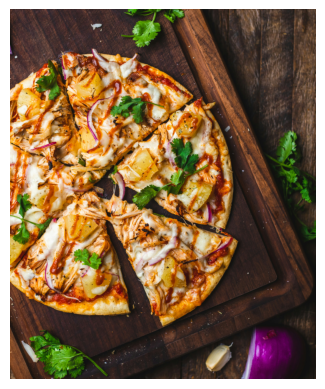

In [42]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/siddhant-rajhans/TensorFlow/main/Basics/assets/images/1_pizza.jpg
pizza = mpimg.imread("1_pizza.jpg")
plt.imshow(pizza)
plt.axis(False);

1/1 [==============================] - 0s 277ms/step


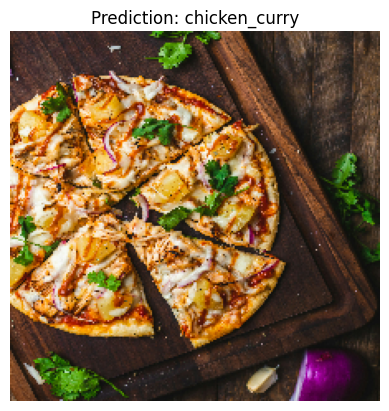

In [40]:
# Testing our model on a custom image
pred_and_plot(model3, "1_pizza.jpg", class_names)

    so the model was huge failure, but guess what!

---

